# Wells spectrum hyperparamter tuning and test

In this notebook the welch MEL spectrum is tested and tunied in terms of fft length window and segtion length etc.

# PLOT and change hyper parameter

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
<feature_extractor_type.MEL_SPECTRUM>[{'n_mels': 64, 'n_fft': 1024, 'power': 2.0, 'hop_length': 512, 'channel': 0}]wav=A:\Dev\NF_Prj_MIMII_Dataset
<feature_extractor_type.MEL_SPECTRUM>[{'n_mels': 64, 'n_fft': 1024, 'power': 2.0, 'hop_length': 512, 'channel': 0}]wav=A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000004.wav


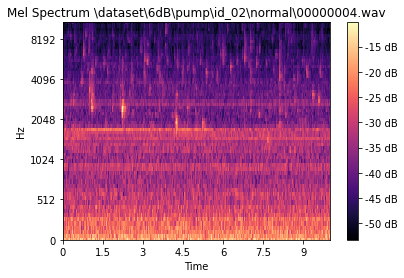

<feature_extractor_type.MEL_SPECTRUM>[{'n_mels': 12, 'n_fft': 128, 'power': 2.0, 'hop_length': 512, 'channel': 0}]wav=A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000004.wav


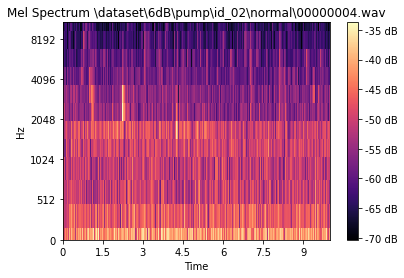

In [21]:
BASE_FOLDER = '../../'
%run -i ..\feature_extractor\JupyterLoad_feature_extractor.py
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
## test:
fe_mel = feature_extractor_mel(BASE_FOLDER,'mel1')
print(fe_mel)
fe_mel.create_from_wav(file_path)
print(fe_mel)
fe_mel.plot()
plt.show()
fe_mel.set_hyperparamter(n_mels=12, n_fft=128)
print(fe_mel)
fe_mel.plot()

# SAVE and Load from file

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
<feature_extractor_type.MEL_SPECTRUM>[{'n_mels': 64, 'n_fft': 512, 'power': 2.0, 'hop_length': 512, 'channel': 0}]wav=A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000004.wav


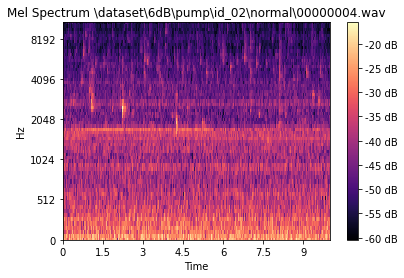

In [22]:
BASE_FOLDER = '../../'
%run -i ..\feature_extractor\JupyterLoad_feature_extractor.py
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
## test:
fe_mel = feature_extractor_mel(BASE_FOLDER,'mel1')
fe_mel.set_hyperparamter(n_fft=512)
fe_mel.create_from_wav(file_path)
print(fe_mel)
fe_mel.save_to_file('test.pkl')

##-
fe_mel_read = feature_extractor_from_file('test.pkl','../../')
fe_mel_read.plot()

In [87]:
16000/2

8000.0

# 3 outputs

In [7]:
BASE_FOLDER = '../../'
%run -i ..\feature_extractor\JupyterLoad_feature_extractor.py
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
## test:
fe_mel = feature_extractor_mel(BASE_FOLDER,'mel1')
fe_mel.create_from_wav(file_path)
# flat feature simplest
#fe_mel.flat_feature().shape
fe_mel.get_feature({'function': 'flat'}).shape
fe_mel.get_feature({'function': 'flatzo'}).shape

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd


Exception: feat get function "flatzo" unknown

(64, 313)
320 309
(309, 320)


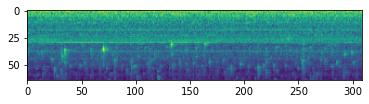

In [4]:
frames = 5
print(fe_mel.feature_data.shape)
n_mels = fe_mel.feature_data.shape[0]
dims = n_mels * frames 
vectorarray_size = len(fe_mel.feature_data[0, :]) - frames + 1
print(dims, vectorarray_size)
vectorarray = np.zeros((vectorarray_size, dims), float)
print(vectorarray.shape)
for t in range(frames):
        vectorarray[:, n_mels * t: n_mels * (t + 1)] = fe_mel.feature_data[:, t: t + vectorarray_size].T

        
plt.imshow(vectorarray[:,0:n_mels].T)

In [135]:
fe_mel.feature_data.flatten().shape

(20032,)

## ouput frame matrix

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd


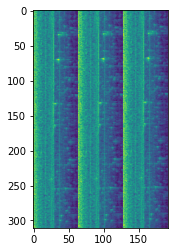

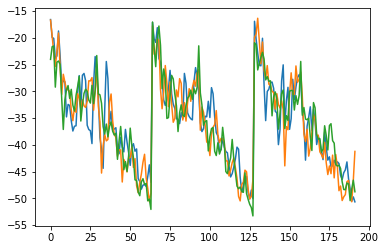

In [3]:
BASE_FOLDER = '../../'
%run -i ..\feature_extractor\JupyterLoad_feature_extractor.py
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
## test:
fe_mel = feature_extractor_mel(BASE_FOLDER,'mel1')
fe_mel.create_from_wav(file_path)
#fframe_ = fe_mel.frame_pack_feature(3)
fframe_ = fe_mel.get_feature({'function': 'frame', 'frames': 3})
plt.imshow(fframe_)
plt.show()
plt.plot(fframe_[0,:])
plt.plot(fframe_[10,:])
plt.plot(fframe_[50,:])